In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error,classification_report

#train_df = pd.read_csv('data/train.csv')
train_df = pd.read_csv('train.csv')

train_df.info()

train_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713605 entries, 0 to 713604
Columns: 1584 entries, OBJECTID to FIPS_NAME_Zavala
dtypes: float64(8), int64(1561), object(15)
memory usage: 8.4+ GB


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIPS_NAME_Yellowstone,FIPS_NAME_Yoakum,FIPS_NAME_Yolo,FIPS_NAME_York,FIPS_NAME_Young,FIPS_NAME_Yuba,FIPS_NAME_Yukon-Koyukuk,FIPS_NAME_Yuma,FIPS_NAME_Zapata,FIPS_NAME_Zavala
382851,1824116,300243305,SFO-2015WI-WIS61250212015,NONFED,ST-NASF,ST/C&L,USWIWIS,Wisconsin Department of Natural Resources,WIWIS,Wisconsin Department of Natural Resources,...,0,0,0,0,0,0,0,0,0,0
117872,177696,179832,W-328651,FED,DOI-WFMI,BIA,USNDTMA,Turtle Mountain Agency,NDTMA,Turtle Mountain Agency,...,0,0,0,0,0,0,0,0,0,0
393223,1834104,300256472,SFO-2015KS00003423,NONFED,ST-NASF,ST/C&L,USKSKSS,Kansas State Forestry,KSKSS,Kansas State Forestry (PBC Area),...,0,0,0,0,0,0,0,0,0,0
338419,1818227,300236310,SFO-2015ARARSAFC46766,NONFED,ST-NASF,ST/C&L,USARARS,Arkansas Forestry Commission,ARARS,Arkansas Forestry Commission,...,0,0,0,0,0,0,0,0,0,0
385092,371398,383374,FWS-2006TXRGRCBU2,FED,FWS-FMIS,FWS,USTXRGR,Lower Rio Grande Valley National Wildlife Refuge,TXRGR,Lower Rio Grande Valley National Wildlife Refuge,...,0,0,0,0,0,0,0,0,0,0
552524,366243,377483,FWS-2002NMSER2269,FED,FWS-FMIS,FWS,USNMSER,Sevilleta National Wildlife Refuge,NMSER,Sevilleta National Wildlife Refuge,...,0,0,0,0,0,0,0,0,0,0
550514,1454429,20020553,FS-1496931,FED,FS-FIRESTAT,FS,USIDBOF,Boise National Forest,0402,Boise National Forest,...,0,0,0,0,0,0,0,0,0,0
106702,1227916,1615515,SFO-OK-3-2003-30387-A,NONFED,ST-NASF,ST/C&L,USOKOKS,Oklahoma Division of Forestry,OKOFS,Oklahoma Forestry Services,...,0,0,0,0,0,0,0,0,0,0
338895,320795,327535,W-535787,FED,DOI-WFMI,BLM,USCANOD,Northern California District,CANOD,Northern California District,...,0,0,0,0,0,0,0,0,0,0
457273,1621406,201656427,SFO-NY-2012-NY1420-2012-0000132,NONFED,ST-NASF,ST/C&L,USNYNYX,Fire Department of New York,NY1420,Fire Department of New York,...,0,0,0,0,0,0,0,0,0,0


In [2]:
print(train_df.FIPS_NAME.unique())
FIPS_NAME_List = train_df.FIPS_NAME.unique()
print(len(FIPS_NAME_List))

['Rockland' 'Douglas' 'Twin Falls' ... 'Garden' 'Pottawattamie' 'Coal']
1523


In [3]:
#print(train_df.columns)
column_list = train_df.columns
for i in range(len(column_list)):
    print(column_list[i])

OBJECTID
FOD_ID
FPA_ID
SOURCE_SYSTEM_TYPE
SOURCE_SYSTEM
NWCG_REPORTING_AGENCY
NWCG_REPORTING_UNIT_ID
NWCG_REPORTING_UNIT_NAME
SOURCE_REPORTING_UNIT
SOURCE_REPORTING_UNIT_NAME
FIRE_NAME
FIRE_YEAR
DISCOVERY_DATE
DISCOVERY_DOY
DISCOVERY_TIME
STAT_CAUSE_CODE
STAT_CAUSE_DESCR
CONT_DATE
CONT_DOY
CONT_TIME
FIRE_SIZE
FIRE_SIZE_CLASS
LATITUDE
LONGITUDE
OWNER_CODE
OWNER_DESCR
STATE
FIPS_NAME
Shape
FIRE_SIZE_CLASS_ENCODED
STAT_CAUSE_DESCR_Arson
STAT_CAUSE_DESCR_Campfire
STAT_CAUSE_DESCR_Children
STAT_CAUSE_DESCR_Debris Burning
STAT_CAUSE_DESCR_Equipment Use
STAT_CAUSE_DESCR_Fireworks
STAT_CAUSE_DESCR_Lightning
STAT_CAUSE_DESCR_Miscellaneous
STAT_CAUSE_DESCR_Missing/Undefined
STAT_CAUSE_DESCR_Powerline
STAT_CAUSE_DESCR_Railroad
STAT_CAUSE_DESCR_Smoking
STAT_CAUSE_DESCR_Structure
FIPS_NAME_Abbeville
FIPS_NAME_Acadia
FIPS_NAME_Ada
FIPS_NAME_Adair
FIPS_NAME_Adams
FIPS_NAME_Addison
FIPS_NAME_Aiken
FIPS_NAME_Aitkin
FIPS_NAME_Alachua
FIPS_NAME_Alamance
FIPS_NAME_Alameda
FIPS_NAME_Alamosa
FIPS_NAME_Alban

In [4]:
"""### Scaling Fire size"""

scaler = MinMaxScaler()
#train_df['FIRE_SIZE_SCALED'] = scaler.fit_transform(train_df[['FIRE_SIZE']])



In [5]:
"""### Selecting Important Columns"""

#good_cols = ["FIRE_YEAR","DISCOVERY_DOY","DISCOVERY_TIME","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE",
#             "FIRE_SIZE_SCALED","LATITUDE","LONGITUDE","STATE","DISCOVERY_DATE"]

good_cols = ["FIRE_YEAR","DISCOVERY_DOY","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE",
             "FIRE_SIZE","LATITUDE","LONGITUDE","STATE"]

#prefix1 = 'STAT_CAUSE_DESCR_'
#prefix2 = 'FIPS_NAME_'

# select the columns you want to keep

keep_cols = good_cols 

df_interest = train_df[keep_cols]

print(df_interest.head())


X = df_interest.drop(["STATE"], axis=1)
X = scaler.fit_transform(X.to_numpy())
y = LabelEncoder().fit_transform(df_interest.STATE.values)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

print("--------------X after fit_transform using minmax scaler----------------------------")
pdX = pd.DataFrame(X)
print(pdX.head())

print("--------------y after fit_transform using LabelEncoder----------------------------")
pdy = pd.DataFrame(y)
print(pdy.head())

   FIRE_YEAR  DISCOVERY_DOY  CONT_DOY  CONT_TIME  STAT_CAUSE_CODE  FIRE_SIZE   
0       2012             71      71.0       1943              9.0        0.1  \
1       2012            225     225.0       1730              4.0        0.1   
2       2006            182     183.0       1500              1.0       98.6   
3       2010            192     192.0       1515              9.0        0.5   
4       2014             24      24.0       1439              5.0       11.8   

    LATITUDE   LONGITUDE STATE  
0  41.147000  -73.927000    NY  
1  43.084444 -122.617778    OR  
2  42.741900 -114.848900    ID  
3  40.293300 -111.977500    UT  
4  31.949458  -83.289372    GA  
Shape of X: (713605, 8)
Shape of y: (713605,)
--------------X after fit_transform using minmax scaler----------------------------
          0         1         2         3         4             5         6   
0  0.869565  0.191781  0.191781  0.823654  0.666667  1.645948e-07  0.442964  \
1  0.869565  0.613699  0.613699  

In [6]:
X_df = pdX
y_df = pdy

In [7]:
# record the number of fires classified per state
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
rows_classified_as_label = {}
row_count = []
for val in class_labels:
  #print(val)
  count = len(y_df[y_df[0] == val])
  row_count.append(count)
  #print(len(y_df[y_df[0] == val]))
  rows_classified_as_label[val] = count

print(rows_classified_as_label)

{0: 4166, 1: 17178, 2: 7574, 3: 51493, 4: 73082, 5: 22445, 6: 172, 7: 49, 8: 31, 9: 16864, 10: 78608, 11: 128, 12: 281, 13: 24279, 14: 1287, 15: 1172, 16: 4921, 17: 10262, 18: 2503, 19: 259, 20: 687, 21: 3163, 22: 5378, 23: 15355, 24: 5385, 25: 33509, 26: 29315, 27: 20460, 28: 11293, 29: 4175, 30: 90, 31: 1953, 32: 21960, 33: 13435, 34: 52410, 35: 1145, 36: 23851, 37: 33534, 38: 3585, 39: 187, 40: 285, 41: 9527, 42: 16406, 43: 8517, 44: 10998, 45: 18574, 46: 1105, 47: 37, 48: 16222, 49: 11651, 50: 13403, 51: 9256}


In [8]:
print(y_df.shape)

(713605, 1)


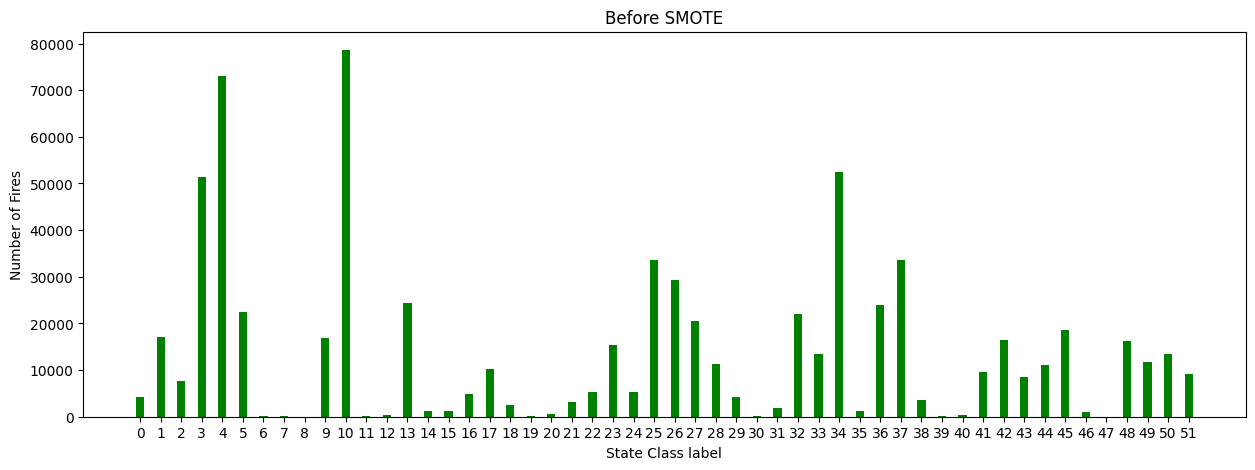

In [9]:
# show records/fires classified per class before SMOTE using bar chart
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 5))

plt.bar(class_labels, row_count, color ='green',
        width = 0.4)
 
plt.xlabel("State Class label")
plt.ylabel("Number of Fires")
plt.title("Before SMOTE")
plt.xticks(class_labels)
plt.show()

In [10]:
# Apply SMOTE to the training set i.e oversample all classes except the majority class
import numpy as np
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=21,k_neighbors=2)
X_df = np.array(X_df)
y_df = np.array(y_df)
X_df, y_df = sm.fit_resample(X_df, y_df)

from collections import Counter
print('Resampled training dataset shape: %s' % Counter(y_df))

class_label = []
row_count_per_class = []
for key in Counter(y_df):
  class_label.append(key)
  row_count_per_class.append(Counter(y_df)[key])

print(class_label)
print(row_count_per_class)

Resampled training dataset shape: Counter({34: 78608, 37: 78608, 13: 78608, 45: 78608, 10: 78608, 41: 78608, 28: 78608, 4: 78608, 40: 78608, 49: 78608, 5: 78608, 32: 78608, 17: 78608, 3: 78608, 50: 78608, 43: 78608, 51: 78608, 26: 78608, 27: 78608, 23: 78608, 25: 78608, 22: 78608, 33: 78608, 1: 78608, 36: 78608, 42: 78608, 16: 78608, 38: 78608, 21: 78608, 48: 78608, 9: 78608, 24: 78608, 2: 78608, 15: 78608, 35: 78608, 44: 78608, 0: 78608, 29: 78608, 18: 78608, 31: 78608, 12: 78608, 14: 78608, 46: 78608, 19: 78608, 20: 78608, 7: 78608, 11: 78608, 30: 78608, 6: 78608, 39: 78608, 47: 78608, 8: 78608})
[34, 37, 13, 45, 10, 41, 28, 4, 40, 49, 5, 32, 17, 3, 50, 43, 51, 26, 27, 23, 25, 22, 33, 1, 36, 42, 16, 38, 21, 48, 9, 24, 2, 15, 35, 44, 0, 29, 18, 31, 12, 14, 46, 19, 20, 7, 11, 30, 6, 39, 47, 8]
[78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608, 78608

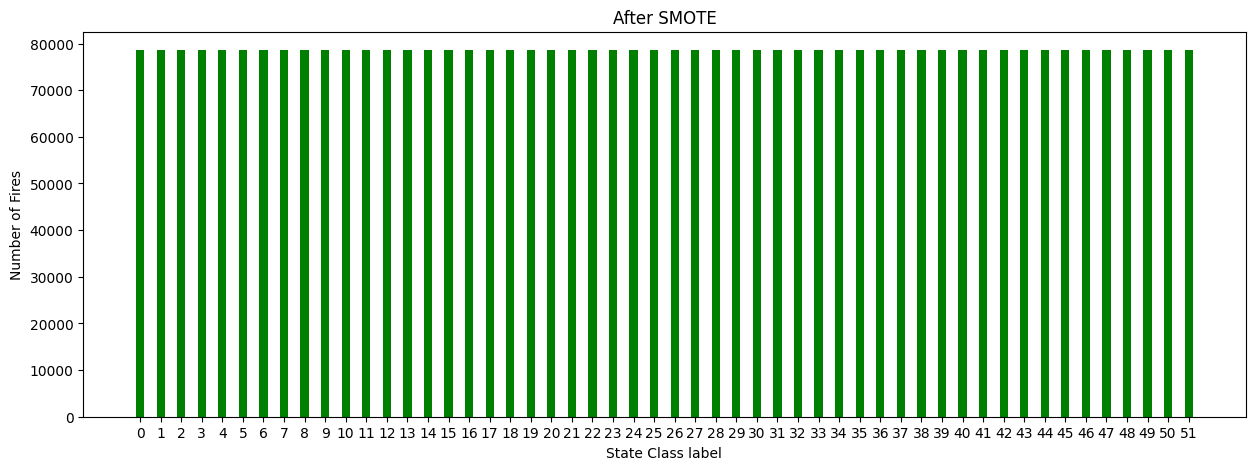

In [11]:
# show images classified per class after SMOTE using bar chart
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 5))

plt.bar(class_label, row_count_per_class, color ='green',
        width = 0.4)
 
plt.xlabel("State Class label")
plt.ylabel("Number of Fires")
plt.title("After SMOTE")
plt.xticks(class_label)
plt.show()

In [12]:
#print(X.sample(10))
print("------------------------------------------------------------")
#print(y.sample(10))

------------------------------------------------------------


In [13]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train model using ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=50, random_state=0) 
classifier.fit(X_train, y_train)

# Evaluate the model
y_pred_train = classifier.predict(X_train)
y_pred_val = classifier.predict(X_val)

print("---------------------classification_report-----------------------------------------")
print(classification_report(y_val, y_pred_val))
# mse_train = mean_squared_error(y_train, y_pred_train)
# mse_val = mean_squared_error(y_val, y_pred_val)
# print("MSE on training set:", mse_train)
# print("MSE on validation set:", mse_val)

---------------------classification_report-----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       0.97      0.96      0.97      3396
           2       0.97      0.93      0.95      1534
           3       0.98      0.99      0.98     10436
           4       0.97      0.99      0.98     14669
           5       0.96      0.98      0.97      4428
           6       1.00      0.79      0.88        28
           7       1.00      0.33      0.50        15
           8       1.00      0.33      0.50         6
           9       0.99      0.98      0.98      3358
          10       0.97      0.99      0.98     15563
          11       1.00      1.00      1.00        33
          12       0.98      0.82      0.89        51
          13       0.95      0.95      0.95      4861
          14       0.97      0.86      0.91       278
          15       1.00      0.94      0.97       2

In [15]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("---------------------Confusion Matrix------------------------------------------")
cm = confusion_matrix(y_val, y_pred_val)
print(cm)

print("---------------------Score------------------------------------------")
# mean accuracy on the given test data and labels.
print(classifier.score(X_val,y_val))

print("---------------------f1_score-----------------------------------------")
print(f1_score(y_val,y_pred_val,average='macro')) 

print("---------------------accuracy_score-----------------------------------------")
print(accuracy_score(y_val,y_pred_val))

---------------------Confusion Matrix------------------------------------------
[[ 837    0    0 ...    0    0    0]
 [   0 3276    0 ...    0    0    0]
 [   0    1 1432 ...    0    0    0]
 ...
 [   0    0    0 ... 2334    0    0]
 [   0    0    0 ...    0 2609    0]
 [   0    0    0 ...    0    0 1764]]
---------------------Score------------------------------------------
0.9740542737228579
---------------------f1_score-----------------------------------------
0.9182819053615201
---------------------accuracy_score-----------------------------------------
0.9740542737228579


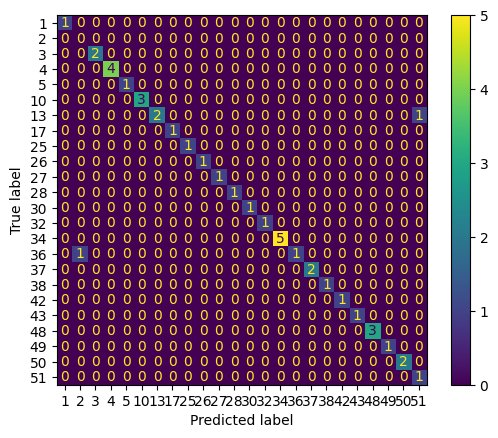

In [16]:
# plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val[:40], y_pred_val[:40])
plt.show()

In [17]:
print(train_df.STATE.unique())

['NY' 'OR' 'ID' 'UT' 'GA' 'SC' 'ND' 'CA' 'RI' 'WI' 'CO' 'NM' 'KY' 'AZ'
 'WV' 'TN' 'WY' 'MT' 'NC' 'MN' 'MS' 'MI' 'NV' 'AL' 'OK' 'SD' 'KS' 'PA'
 'ME' 'WA' 'FL' 'MO' 'AR' 'IN' 'OH' 'TX' 'AK' 'NE' 'LA' 'NJ' 'IA' 'IL'
 'VA' 'MA' 'MD' 'DC' 'HI' 'NH' 'CT' 'PR' 'VT' 'DE']


In [18]:
print(y_val)

[17  1 50 ...  4 50 48]


In [19]:
print(y_pred_val)

[17  1 50 ...  4 50 48]


In [20]:
print(y_pred_val.shape)

(142721,)


In [21]:
unique_class_labels = pdy[0].unique()
print(sorted(unique_class_labels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


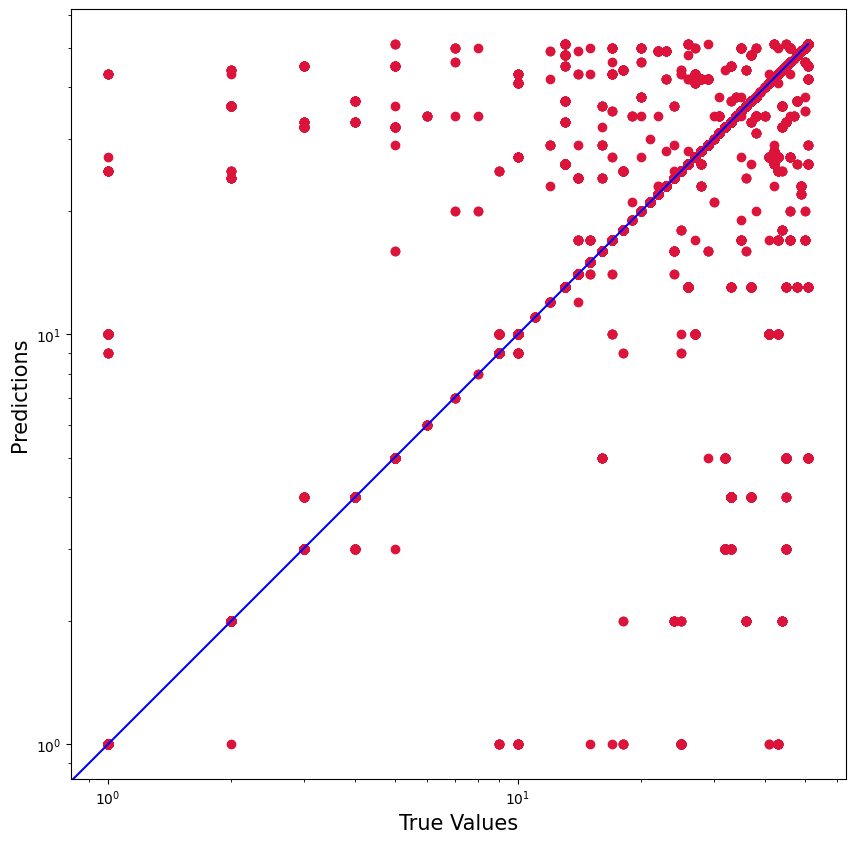

In [22]:
#plt.plot(y_pred_val[:10000], y_val[:10000], label = "True predictions")
#plt.plot(index, y_pred_val, label = "line 2")

plt.figure(figsize=(10,10))
plt.scatter(y_val, y_pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_val), max(y_val))
p2 = min(min(y_pred_val), min(y_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

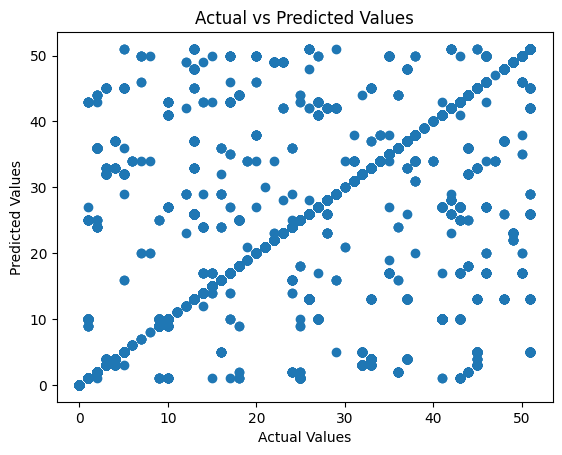

In [23]:
# Create scatter plot with actual and predicted values
plt.scatter(y_val, y_pred_val)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Testing on test data

In [24]:
test_df = pd.read_csv('test.csv')
#x_test = test_df.drop(['FIRE_SIZE_CLASS'], axis=1)
#y_test = test_df['FIRE_SIZE_CLASS']

In [25]:
good_cols = ["FIRE_YEAR","DISCOVERY_DOY","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE",
             "FIRE_SIZE","LATITUDE","LONGITUDE","STATE"]

#prefix1 = 'STAT_CAUSE_DESCR_'
#prefix2 = 'FIPS_NAME_'

# select the columns you want to keep

keep_cols = good_cols 

df_interest1 = test_df[keep_cols]

print(df_interest1.head())


x_test = df_interest1.drop(["STATE"], axis=1)
x_test = scaler.fit_transform(x_test.to_numpy())
y_test = LabelEncoder().fit_transform(df_interest1.STATE.values)

print(f"Shape of X: {x_test.shape}")
print(f"Shape of y: {y_test.shape}")

print("--------------x_test after fit_transform using minmax scaler----------------------------")
pdX = pd.DataFrame(x_test)
print(pdX.head())

print("--------------y_test after fit_transform using LabelEncoder----------------------------")
pdy = pd.DataFrame(y_test)
print(pdy.head())

   FIRE_YEAR  DISCOVERY_DOY  CONT_DOY  CONT_TIME  STAT_CAUSE_CODE  FIRE_SIZE   
0       2001            225     226.0       1600              1.0        0.1  \
1       2000            245     245.0       1605              1.0        6.0   
2       2015             24      24.0       1440              2.0        2.0   
3       2002            241     241.0       1550              1.0        0.1   
4       1997            234     234.0       2210              1.0        2.0   

    LATITUDE   LONGITUDE STATE  
0  43.621111 -121.953611    OR  
1  31.441944  -88.989167    MS  
2  38.160000  -96.000000    KS  
3  45.462222 -118.094722    OR  
4  38.483950 -107.051800    CO  
Shape of X: (178402, 8)
Shape of y: (178402,)
--------------x_test after fit_transform using minmax scaler----------------------------
          0         1         2         3         4             5         6   
0  0.391304  0.613699  0.616438  0.678253  0.000000  2.897055e-07  0.494497  \
1  0.347826  0.668493  0.668

In [26]:
predict = classifier.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1087
           1       0.88      0.86      0.87      4307
           2       0.93      0.55      0.69      1840
           3       0.83      0.87      0.85     12746
           4       0.87      0.98      0.92     18102
           5       0.89      0.44      0.59      5708
           6       1.00      0.67      0.80        45
           7       1.00      0.29      0.44        14
           8       1.00      0.25      0.40         4
           9       0.99      0.93      0.96      4263
          10       0.96      0.97      0.97     19917
          11       1.00      1.00      1.00        36
          12       0.94      0.56      0.70        59
          13       0.52      0.38      0.44      6034
          14       0.79      0.57      0.67       324
          15       0.97      0.86      0.91       293
          16       0.90      0.95      0.92      1243
          17       0.90    

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("---------------------Confusion Matrix------------------------------------------")
cm = confusion_matrix(y_test, predict)
print(cm)

print("---------------------Score------------------------------------------")
# mean accuracy on the given test data and labels.
print(classifier.score(x_test,y_test))

print("---------------------f1_score-----------------------------------------")
print(f1_score(y_test,predict,average='macro')) 

print("---------------------accuracy_score-----------------------------------------")
print(accuracy_score(y_test,predict))

---------------------Confusion Matrix------------------------------------------
[[1087    0    0 ...    0    0    0]
 [   0 3725    1 ...    0    1    0]
 [   0    0 1005 ...    0    0    0]
 ...
 [   0    0    0 ... 2694    0    0]
 [   0    0    0 ...    0 3114    0]
 [   0    0    0 ...    0    0 1485]]
---------------------Score------------------------------------------
0.8518962791896952
---------------------f1_score-----------------------------------------
0.7943553255137719
---------------------accuracy_score-----------------------------------------
0.8518962791896952
